# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import  accuracy_score, f1_score, precision_score
import matplotlib.pyplot as plt
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    roc_curve, auc, precision_recall_curve
)
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
import joblib

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\THINKPAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\THINKPAD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\THINKPAD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Loading Datasets

In [2]:
fake = pd.read_csv("Fake.csv")
true = pd.read_csv("True.csv")

In [3]:
print("Fake News Dataset Shape:", fake.shape)
print("True News Dataset Shape:", true.shape)


Fake News Dataset Shape: (23481, 4)
True News Dataset Shape: (21417, 4)


In [4]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
fake.tail()

,title,text,subject,date
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


In [6]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [7]:
true.tail()

,title,text,subject,date
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [8]:
# Concat two data frames together 

fake["label"] = 0  # 0 = Fake
true["label"] = 1  # 1 = Real

df = pd.concat([fake, true], axis=0)


In [9]:
df['content'] = df['title'].fillna('') + ' ' + df['text'].fillna('')
df = df[['content','label']]
df.head()

,content,label
0,Donald Trump Sends Out Embarrassing New Year’...,0
1,Drunk Bragging Trump Staffer Started Russian ...,0
2,Sheriff David Clarke Becomes An Internet Joke...,0
3,Trump Is So Obsessed He Even Has Obama’s Name...,0
4,Pope Francis Just Called Out Donald Trump Dur...,0


<Axes: >

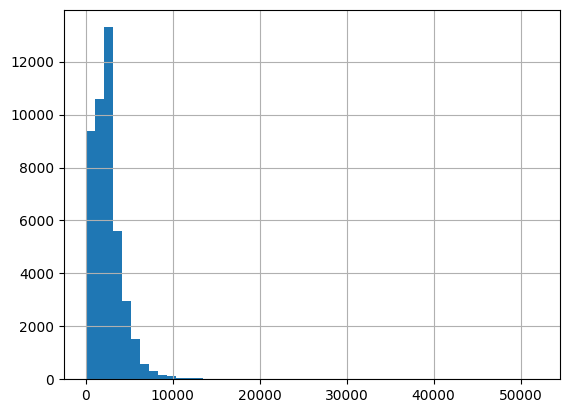

In [10]:
df['length'] = df['content'].str.len()
df['label'].value_counts(normalize=True)
df['length'].hist(bins=50)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44898 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  44898 non-null  object
 1   label    44898 non-null  int64 
 2   length   44898 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.4+ MB


In [12]:
df.describe()

,label,length
count,44898.000000,44898.000000
mean,0.477015,2550.221413
std,0.499477,2172.578772
min,0.000000,31.000000
25%,0.000000,1318.000000
50%,0.000000,2270.000000
75%,1.000000,3189.000000
max,1.000000,51893.000000


In [13]:
df.shape

(44898, 3)

In [14]:
df.columns

Index(['content', 'label', 'length'], dtype='object')

In [15]:
df.dtypes

content    object
label       int64
length      int64
dtype: object

# Missing Values

In [16]:
print(df.isnull().sum())


content    0
label      0
length     0
dtype: int64


* There is no null value.That's what make us happy.

# Duplicate Values

In [17]:
# Check total duplicates
print("Total Duplicates:", df.duplicated().sum())

# Show first few duplicate rows (if any)
duplicates = df[df.duplicated()]
print("Duplicate Rows:\n", duplicates.head())


Total Duplicates: 5793
Duplicate Rows:
                                                  content  label  length
9942   HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...      0    2051
11446  FORMER DEMOCRAT WARNS Young Americans: “Rioter...      0     713
14925  [VIDEO] #BlackLivesMatter Terrorists Storm Dar...      0    1509
15892  HOUSE INTEL Slaps Subpoenas on McCain Institut...      0    4815
15893  PRICELESS! WATCH MSNBC HOST’S Shocked Response...      0    1514


In [18]:
# Remove duplicates
df = df.drop_duplicates().reset_index(drop=True)

print("Shape after removing duplicates:", df.shape)


Shape after removing duplicates: (39105, 3)


# Visualize

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_8632\448218469.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="coolwarm")


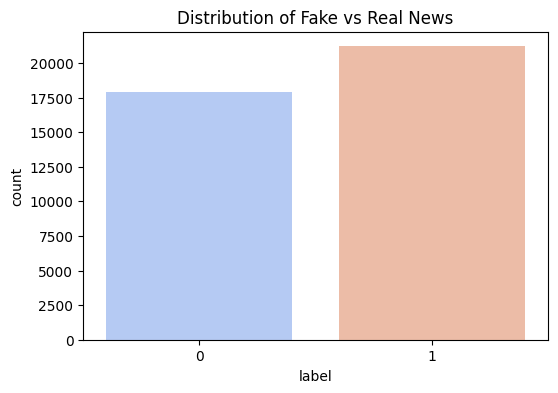

In [19]:

plt.figure(figsize=(6,4))
sns.countplot(x="label", data=df, palette="coolwarm")
plt.title("Distribution of Fake vs Real News")
plt.show()

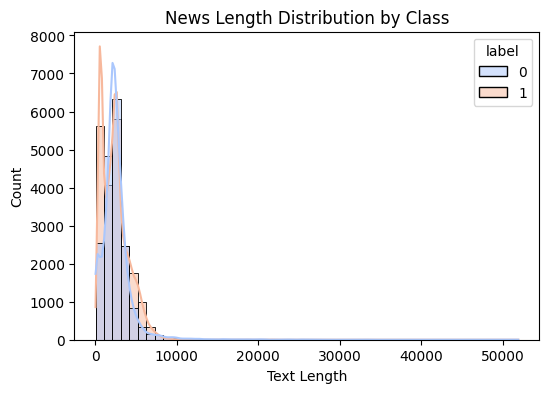

In [20]:
df["text_length"] = df["content"].apply(len)

plt.figure(figsize=(6,4))
sns.histplot(data=df, x="text_length", hue="label", bins=50, kde=True, palette="coolwarm")
plt.title("News Length Distribution by Class")
plt.xlabel("Text Length")
plt.ylabel("Count")
plt.show()


# Preprocessing

In [21]:
import string
# uppercase to lowercase
df["content"] = df["content"].str.lower()

# deleting link and stuff XD
df["content"] = df["content"].apply(lambda x: re.sub(r'http\S+|www\S+|https\S+', '', x))  
df["content"] = df["content"].apply(lambda x: re.sub(r'\d+', '', x))  
df["content"] = df["content"].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))  

In [22]:
# delete stopwords
stop_words = set(stopwords.words('english'))
df["content"] = df["content"].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

In [23]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df["content"] = df["content"].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

In [24]:
df["content"].head()

0    donald trump sends embarrassing new year’s eve...
1    drunk bragging trump staffer started russian c...
2    sheriff david clarke becomes internet joke thr...
3    trump obsessed even obama’s name coded website...
4    pope francis called donald trump christmas spe...
Name: content, dtype: object

# Feature extraction — TF-IDF

In [25]:
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2))
X = tfidf.fit_transform(df['content'])
y = df['label'].values


# Train / test split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


# Multiple Models

- In this section, I tried to examine different models and work on the winner one 

# Logistic Regression

Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      3582
           1       0.99      1.00      0.99      4239

    accuracy                           0.99      7821
   macro avg       0.99      0.99      0.99      7821
weighted avg       0.99      0.99      0.99      7821



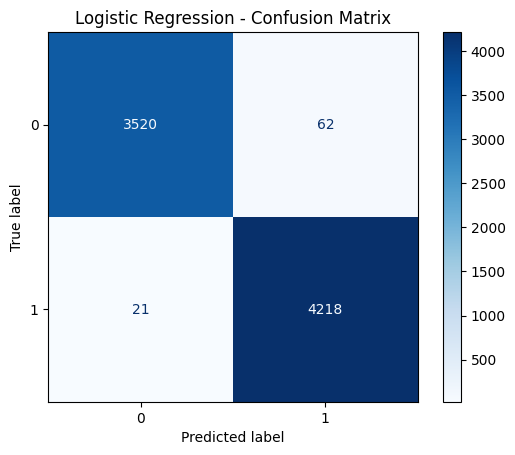

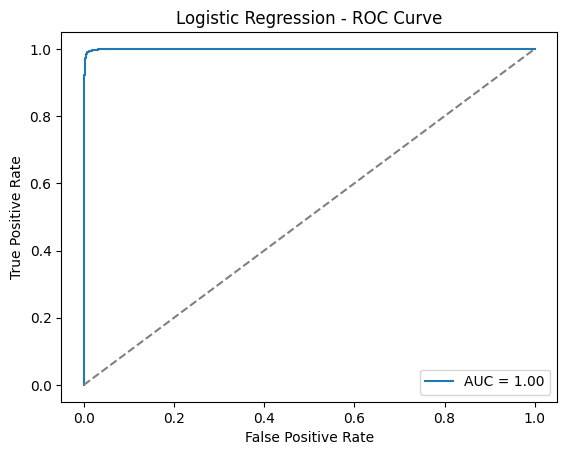

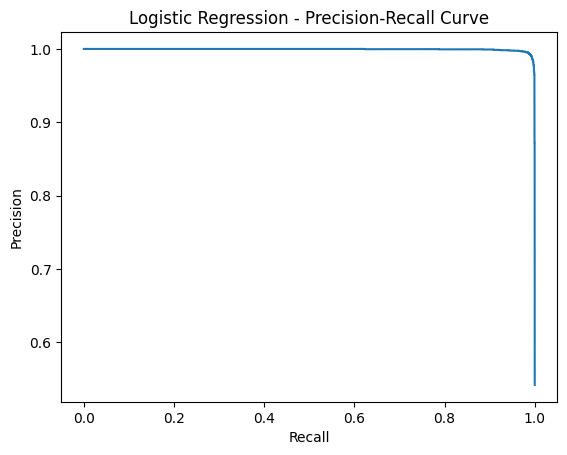

In [27]:
# Logistic Regression
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_proba = lr.predict_proba(X_test)[:,1]

# Classification Report
print("Logistic Regression Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color="gray")
plt.title("Logistic Regression - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision)
plt.title("Logistic Regression - Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


# Linear SVC

Linear SVC Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3582
           1       0.99      1.00      0.99      4239

    accuracy                           0.99      7821
   macro avg       0.99      0.99      0.99      7821
weighted avg       0.99      0.99      0.99      7821



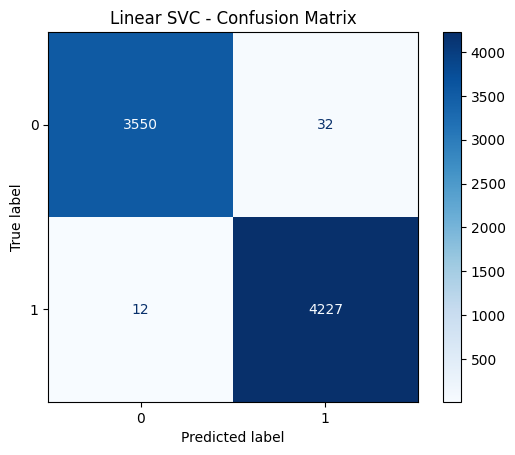

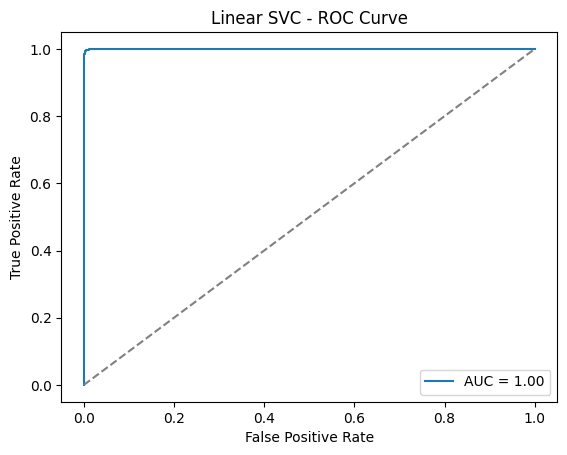

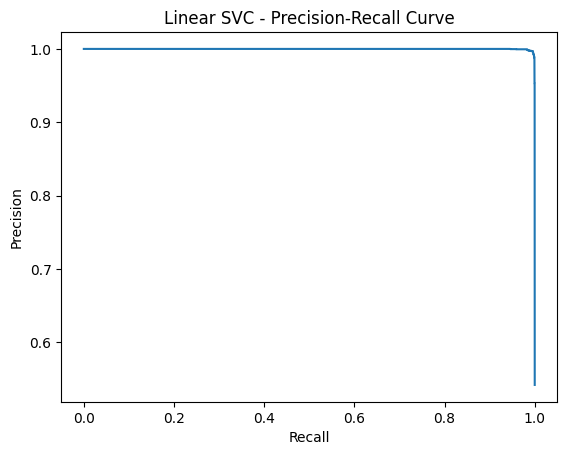

In [28]:
svc = LinearSVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
y_score = svc.decision_function(X_test)

print("Linear SVC Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Linear SVC - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color="gray")
plt.title("Linear SVC - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_score)
plt.plot(recall, precision)
plt.title("Linear SVC - Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


# Multinomial Naive Bayes

Naive Bayes Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      3582
           1       0.96      0.96      0.96      4239

    accuracy                           0.96      7821
   macro avg       0.96      0.96      0.96      7821
weighted avg       0.96      0.96      0.96      7821



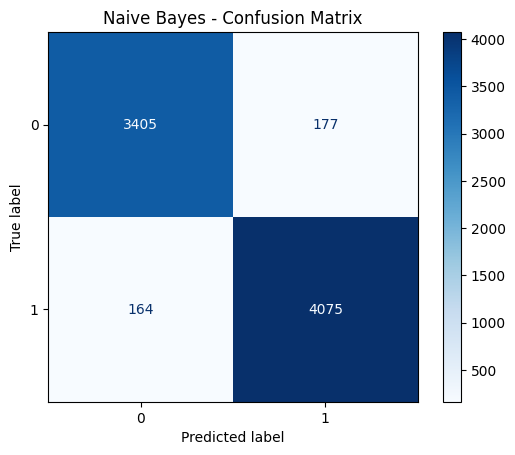

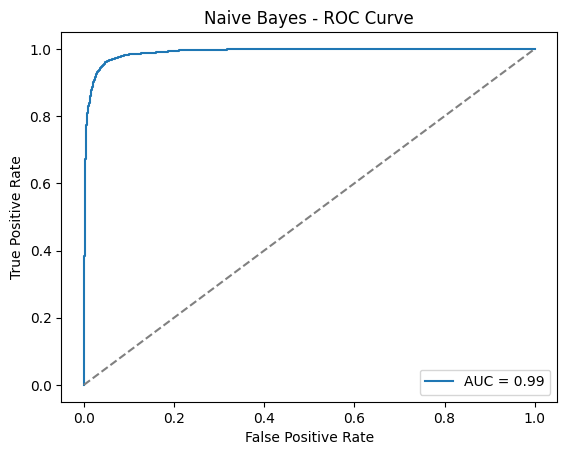

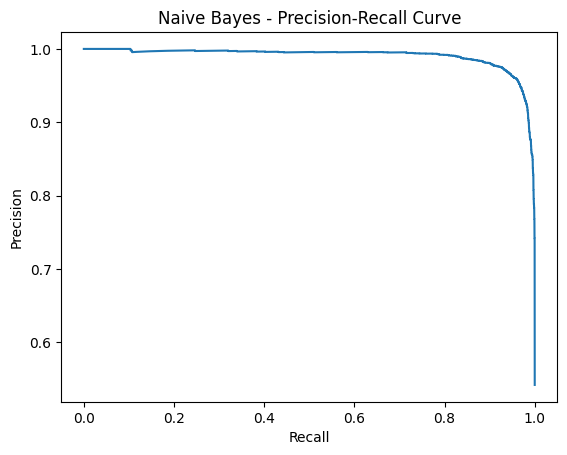

In [29]:
nb = MultinomialNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)
y_proba = nb.predict_proba(X_test)[:,1]

print("Naive Bayes Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Naive Bayes - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color="gray")
plt.title("Naive Bayes - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision)
plt.title("Naive Bayes - Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


# Random Forest

Random Forest Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      3582
           1       0.99      1.00      1.00      4239

    accuracy                           1.00      7821
   macro avg       1.00      1.00      1.00      7821
weighted avg       1.00      1.00      1.00      7821



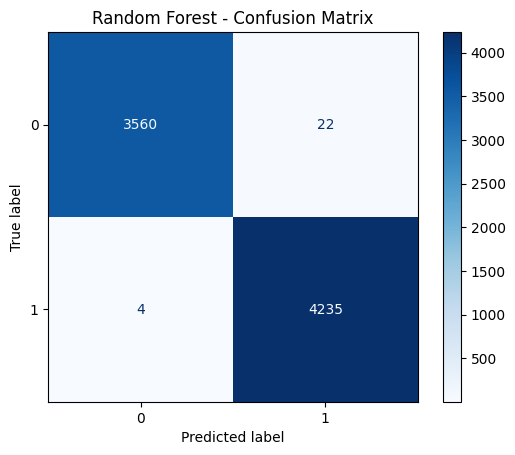

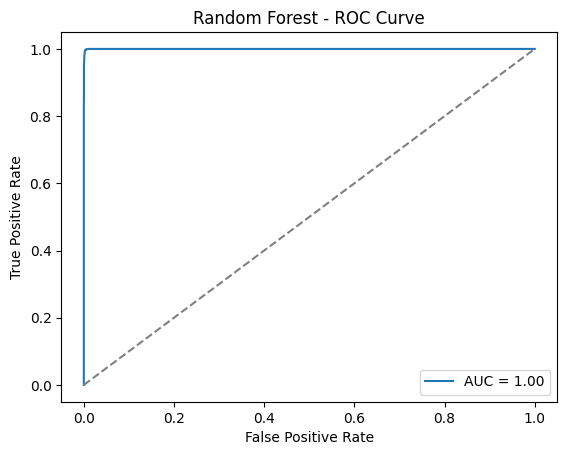

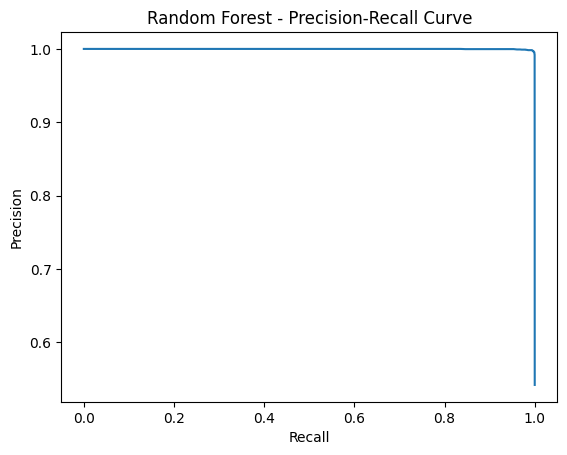

In [30]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

print("Random Forest Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color="gray")
plt.title("Random Forest - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision)
plt.title("Random Forest - Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


# Gradient Boosting

Gradient Boosting Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      3582
           1       0.99      1.00      1.00      4239

    accuracy                           0.99      7821
   macro avg       0.99      0.99      0.99      7821
weighted avg       0.99      0.99      0.99      7821



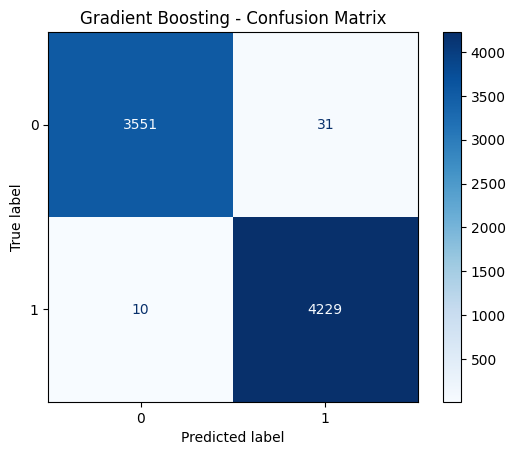

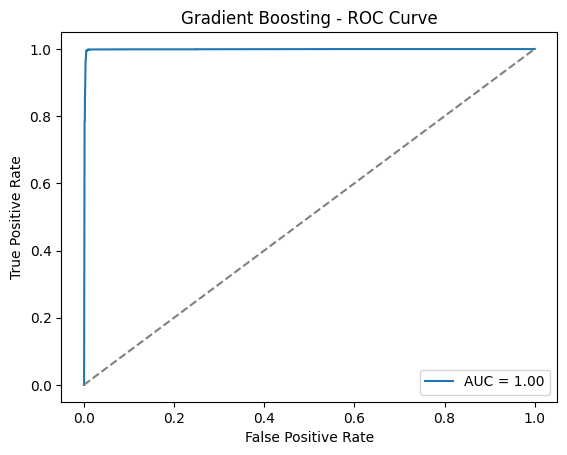

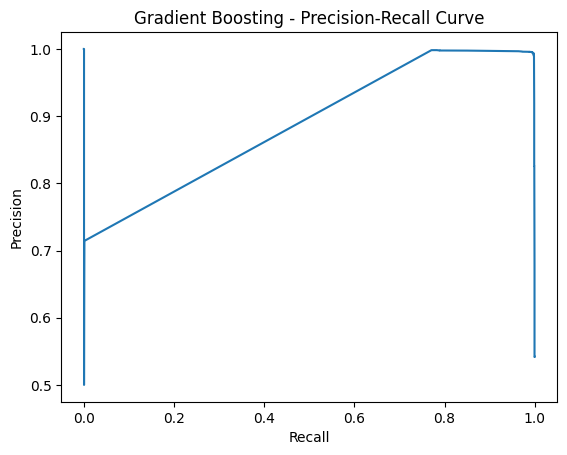

In [31]:
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)
y_proba = gb.predict_proba(X_test)[:,1]

print("Gradient Boosting Report:\n", classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Gradient Boosting - Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'--',color="gray")
plt.title("Gradient Boosting - ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision)
plt.title("Gradient Boosting - Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()


# Confusion Matrix for Best Model

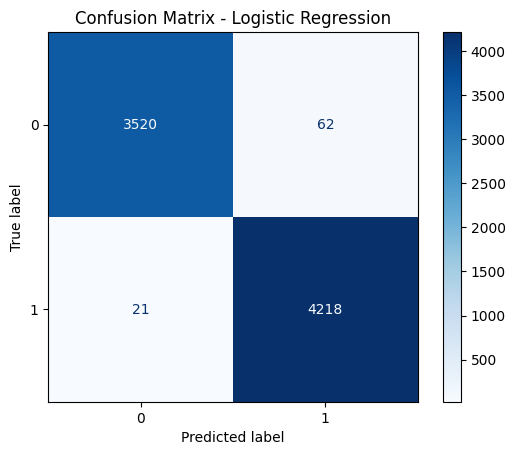

In [33]:
best_model = LogisticRegression(max_iter=200)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()
